# Extra Credit 1

### Use OpenCV to augment the CIFAR-10 dataset with constructed images. Try the following transformations:

    a)	Vertical/horizontal flip
    b)	Rotation by a multiple of 90
    c)	Shifting the image in a particular direction by a few pixels


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np

import cv2
print("OpenCV-Python Version %s" % cv2.__version__)

OpenCV-Python Version 3.4.2


In [2]:
# example
img = cv2.imread('data/cifar10/train/cat/0008.png', cv2.IMREAD_COLOR)

if img is None:
    print ('Open Error')
else:
    print ('Image Loaded')

Image Loaded


In [3]:
# Check the resulting img
print (type(img))
print (img.shape)
print (img.dtype)

<class 'numpy.ndarray'>
(32, 32, 3)
uint8


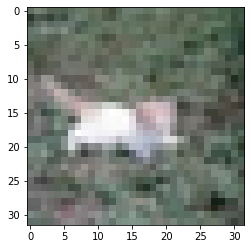

In [4]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### Vertical Flip

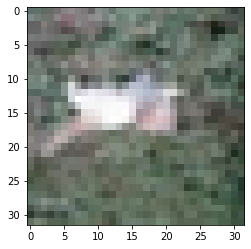

In [5]:
vertical = cv2.flip(img, 0)
plt.imshow(cv2.cvtColor(vertical, cv2.COLOR_BGR2RGB))

### Horizontal Flip

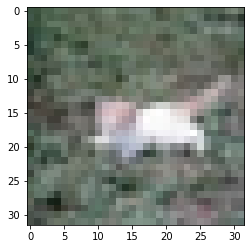

In [6]:
horizontal = cv2.flip(img, 1)
plt.imshow(cv2.cvtColor(horizontal, cv2.COLOR_BGR2RGB))

### Rotation by a multiple of 90


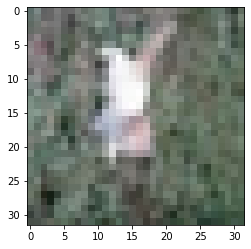

In [7]:
# 90 clockwise
rotate = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(cv2.cvtColor(rotate, cv2.COLOR_BGR2RGB))

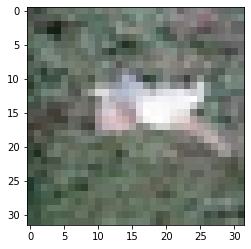

In [8]:
# 180 rotation
rotate = cv2.rotate(img, cv2.ROTATE_180)
plt.imshow(cv2.cvtColor(rotate, cv2.COLOR_BGR2RGB))

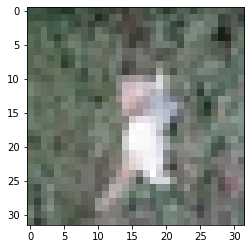

In [9]:
# 90 counter-clockwise
rotate = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
plt.imshow(cv2.cvtColor(rotate, cv2.COLOR_BGR2RGB))

### Shifting the image in a particular direction by a few pixels

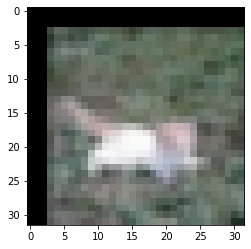

In [10]:
# shift diagonally

# get height and width of image
height, width = img.shape[:2]

# get tx and ty values for translation
tx, ty = width / 10, height / 10
 
# create the translation matrix using tx and ty, it is a NumPy array
translation_matrix = np.array([
    [1, 0, tx],
    [0, 1, ty]
], dtype=np.float32)

translated_image = cv2.warpAffine(src=img, M=translation_matrix, dsize=(width, height))
plt.imshow(cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB))

#### The following code will shift all test cat images on a diagonal:

In [11]:
import imageio
import os
from os import listdir

In [12]:
path = 'data/cifar10/test/cat/shift' # get the path/directory

for images in os.listdir(path):
    
    input_path = os.path.join(path, images)
    img = imageio.imread(input_path)
    
    height, width = img.shape[:2]
    tx, ty = width / 10, height / 10
    
    translation_matrix = np.array([
    [1, 0, tx],
    [0, 1, ty]
    ], dtype=np.float32)
    
    translated_image = cv2.warpAffine(src=img, M=translation_matrix, dsize=(width, height))
    
    fullpath = os.path.join(path, 'shifted_'+images)
    imageio.imsave(fullpath, translated_image)

# Extra Credit 2

1)	Load the 20 newsgroup dataset using sklearn.datasets.  

**Due to computational limitation, I will only use the training subset of the dataset.**

In [13]:
import nltk
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

In [14]:
def twenty_newsgroup_to_csv():
    newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

    df = pd.DataFrame([newsgroups_train.data, newsgroups_train.target.tolist()]).T
    df.columns = ['text', 'target']

    targets = pd.DataFrame( newsgroups_train.target_names)
    targets.columns=['title']

    out = pd.merge(df, targets, left_on='target', right_index=True)
    out.to_csv('20_newsgroup.csv')
    
twenty_newsgroup_to_csv()

In [15]:
df = pd.read_csv("20_newsgroup.csv")
df = df.iloc[:,1:]
df.head()

,text,target,title
0,I was wondering if anyone out there could enli...,7,rec.autos
1,I recently posted an article asking what kind ...,7,rec.autos
2,\nIt depends on your priorities. A lot of peo...,7,rec.autos
3,an excellent automatic can be found in the sub...,7,rec.autos
4,: Ford and his automobile. I need information...,7,rec.autos


2)	Clean the text so that:  

    a)	Every character is lower-cased.  
    b)	Punctuations/numbers are removed.  
    c)	Words which occur in less than 5 documents are removed.  
    d)	“English” stop words are removed. (nltk.corpus.stopwords)  
    e)	Of the remaining words, verbs, nouns and adjectives are replaced with their root words. (e.g.: running => run, children => child, happier => happy).  

In [16]:
# lower case
df['text'] = df['text'].astype(str).str.lower()
df.head()

,text,target,title
0,i was wondering if anyone out there could enli...,7,rec.autos
1,i recently posted an article asking what kind ...,7,rec.autos
2,\nit depends on your priorities. a lot of peo...,7,rec.autos
3,an excellent automatic can be found in the sub...,7,rec.autos
4,: ford and his automobile. i need information...,7,rec.autos


In [17]:
# tokenization will remove punctuation
from nltk.tokenize import RegexpTokenizer
regexp = RegexpTokenizer('\w+')

df['text_token']=df['text'].apply(regexp.tokenize)
df.head()

,text,target,title,text_token
0,i was wondering if anyone out there could enli...,7,rec.autos,"[i, was, wondering, if, anyone, out, there, co..."
1,i recently posted an article asking what kind ...,7,rec.autos,"[i, recently, posted, an, article, asking, wha..."
2,\nit depends on your priorities. a lot of peo...,7,rec.autos,"[it, depends, on, your, priorities, a, lot, of..."
3,an excellent automatic can be found in the sub...,7,rec.autos,"[an, excellent, automatic, can, be, found, in,..."
4,: ford and his automobile. i need information...,7,rec.autos,"[ford, and, his, automobile, i, need, informat..."


In [18]:
from nltk.probability import FreqDist

all_words = ' '.join([word for word in df['text']])
words = nltk.word_tokenize(all_words)
fd = FreqDist(words)
fd_df = pd.DataFrame.from_dict(fd, orient='index')
print(f'Before removing stop words and stemming, we have {sum(fd_df[0])} words')

NameError: name 'FreqDist' is not defined

In [ ]:
# remove stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Extend the list with your own custom stopwords
my_stopwords = []
stopwords.extend(my_stopwords)

df['text_token'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head()

In [ ]:
# stemming - replace with root words
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

df['text_token'] = df['text_token'].apply(lambda x: [stemmer.stem(y) for y in x])
df.head()

In [ ]:
# remove infrequent words
df['text_token'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>5]))
df.head()

3)	Report the number of words you are left with in total (over all documents).  

In [ ]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [ ]:
all_words = ' '.join([word for word in df['text_token']])
words = nltk.word_tokenize(all_words)
fd = FreqDist(words)
fd_dfnew = pd.DataFrame.from_dict(fd, orient='index')
print(f'After cleaning the corpus, we are left with {sum(fd_dfnew[0])} words, which is {sum(fd_df[0]) - sum(fd_dfnew[0])} fewer than we started with')

4)	Calculate TF-IDF vectors for each document.  

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
x = v.fit_transform(df['text_token'])
x.toarray() # very sparse matrix

In [ ]:
# compare to zero-only matrix to verify not empty tfidf vectors
np.array_equal(x.toarray(), np.zeros(x.toarray().shape))

5)	For each class, find and report the top 10 words with highest TF-IDF values averaged over all documents belonging to that class.

In [ ]:
for xx in df['title'].unique():
    df_subset = df[df['title'] == xx]
    target = df_subset['target'].unique()
    print(f'Class: {xx} (target value {target})')
    
    all_words = ' '.join([word for word in df_subset['text_token']])
    words = nltk.word_tokenize(all_words)
    fd = FreqDist(words)
    fddf = pd.DataFrame.from_dict(fd, orient='index').sort_values(0)[::-1][:10]
    columns = ['count']
    fddf.columns=columns
    print(fddf)
    
    print(f'---------------------------------------------------')